# Boosting

In [ ]:
from matplotlib import pyplot
from numpy import arange, asarray
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold, cross_val_score

In [ ]:
def make_clas_dataset(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6):
    X,y = make_classification(n_samples=n_samples, n_features=n_features, 
                              n_informative=n_informative, n_redundant=n_redundant, 
                              random_state=random_state)
    return X,y

In [ ]:
def make_reg_dataset(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=6):
    X,y = make_regression(n_samples=n_samples, n_features=n_features, 
                          n_informative=n_informative, noise=noise,
                          random_state=random_state)
    return X,y

In [ ]:
def show_results(X, y, models):    
    results, names = [], []
    for name, model in models.items():
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
        results.append(scores)
        names.append(name)
        print(f'{name}: {scores.mean():.3f} ({scores.std():.3f})')
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()

# Adaptive Boost Ensemble 

## Evaluate AdaBoost Ensembles

**AdaBoost for Classification**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
X , y = make_clas_dataset()

In [ ]:
model = AdaBoostClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'{results.mean(): .3f} ({results.std():.3f})')

 0.806 (0.041)


In [ ]:
model.fit(X, y)

AdaBoostClassifier()

In [ ]:
row = [-3.47224758, 1.95378146, 0.04875169, -0.91592588, -3.54022468, 1.96405547,
-7.72564954, -2.64787168, -1.81726906, -1.67104974, 2.33762043, -4.30273117, 0.4839841,
-1.28253034, -10.6704077, -0.7641103, -3.58493721, 2.07283886, 0.08385173, 0.91461126]

In [ ]:
yhat = model.predict([row])

In [ ]:
print(f'{yhat[0]}')

0


**AdaBoost for Regression**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
X,y = make_reg_dataset()

In [ ]:
model = AdaBoostRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error' ,cv=cv)
print(f'{results.mean():.3f} ({results.std():0.3f})')

-73.060 (4.739)


In [ ]:
model.fit(X,y)

AdaBoostRegressor()

In [ ]:
row = [1.20871625, 0.88440466, -0.9030013, -0.22687731, -0.82940077, -1.14410988,
1.26554256, -0.2842871, 1.43929072, 0.74250241, 0.34035501, 0.45363034, 0.1778756,
-1.75252881, -1.33337384, -1.50337215, -0.45099008, 0.46160133, 0.58385557, -1.79936198]

In [ ]:
yhat = model.predict([row])
print(f'{yhat[0]}')

-20.370316817882475


## AdaBoost Hyperparameters

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = AdaBoostClassifier(n_estimators=n)
    return models

In [ ]:
X,y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'10': AdaBoostClassifier(n_estimators=10),
 '50': AdaBoostClassifier(),
 '100': AdaBoostClassifier(n_estimators=100)}

10: 0.773 (0.039)
50: 0.806 (0.041)
100: 0.801 (0.032)


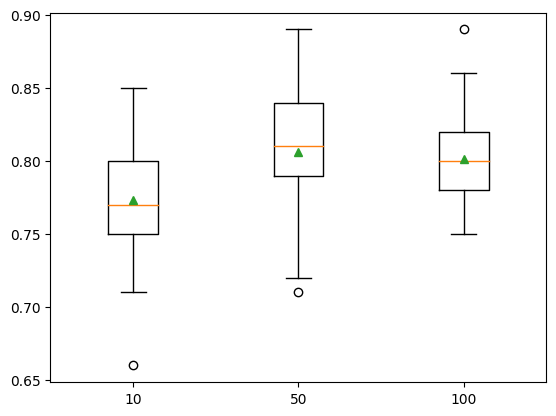

In [ ]:
show_results(X, y, models)

**Explore Weak Learner**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def get_models():
    models = dict()
    for i in range(1,5):
        base = DecisionTreeClassifier(max_depth=i)
        models[str(i)] = AdaBoostClassifier(base_estimator=base)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'1': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
 '2': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
 '3': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3)),
 '4': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4))}

1: 0.806 (0.041)
2: 0.864 (0.028)
3: 0.870 (0.028)
4: 0.897 (0.034)


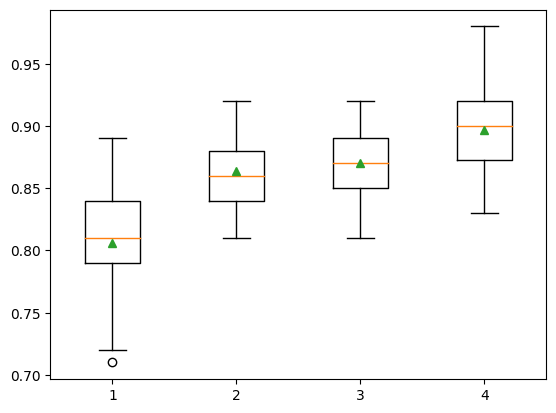

In [ ]:
show_results(X, y, models)

**Explore Learning Rate**

In [ ]:
def get_models():
    models = dict()
    for i in arange(0.1, 0.5, 0.1):
        key = '%0.1f' % i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'0.1': AdaBoostClassifier(learning_rate=0.1),
 '0.2': AdaBoostClassifier(learning_rate=0.2),
 '0.3': AdaBoostClassifier(learning_rate=0.30000000000000004),
 '0.4': AdaBoostClassifier(learning_rate=0.4)}

0.1: 0.767 (0.049)
0.2: 0.786 (0.042)
0.3: 0.802 (0.040)
0.4: 0.798 (0.037)


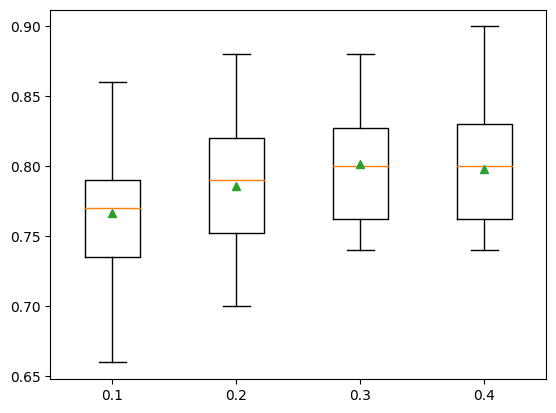

In [ ]:
show_results(X, y, models)

**Explore Alternate Algorithm**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X, y = make_clas_dataset()

In [ ]:
model = AdaBoostClassifier(base_estimator=LogisticRegression())

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y)
print(f'{results.mean(): 0.3f} ({results.std():.3f})')

 0.793 (0.034)


**Grid Search Hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X, y = make_clas_dataset()

In [ ]:
model = AdaBoostClassifier()

In [ ]:
grid = dict()
grid['n_estimators'] = [10, 50, 100]
grid['learning_rate'] = [0.0001, 0.001, 0.01]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='accuracy',cv=cv)

In [ ]:
grid_result = grid_search.fit(X, y)

In [ ]:
print(f'Best {grid_result.best_score_} using ({grid_result.best_params_})')

Best 0.715 using ({'learning_rate': 0.01, 'n_estimators': 100})


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean:0.3f} ({stdev:0.3f}) with {param}')

0.646 (0.036) with {'learning_rate': 0.0001, 'n_estimators': 10}
0.647 (0.037) with {'learning_rate': 0.0001, 'n_estimators': 50}
0.647 (0.037) with {'learning_rate': 0.0001, 'n_estimators': 100}
0.647 (0.037) with {'learning_rate': 0.001, 'n_estimators': 10}
0.647 (0.038) with {'learning_rate': 0.001, 'n_estimators': 50}
0.654 (0.046) with {'learning_rate': 0.001, 'n_estimators': 100}
0.648 (0.042) with {'learning_rate': 0.01, 'n_estimators': 10}
0.672 (0.046) with {'learning_rate': 0.01, 'n_estimators': 50}
0.715 (0.053) with {'learning_rate': 0.01, 'n_estimators': 100}


# Gradient Boosting Ensemble 

## Evaluate Gradient Boosting Ensembles

**Gradient Boosting for Classification**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
X, y = make_clas_dataset()

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print(f'{results.mean(): 0.3f} ({results.std(): 0.3f})')

 0.888 ( 0.032)


In [ ]:
model.fit(X, y)

GradientBoostingClassifier()

In [ ]:
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388,
-7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332,
4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]

In [ ]:
yhat = model.predict([row])
print(yhat[0])

0


**Gradient Boosting for Regression**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
X, y = make_reg_dataset(random_state=7)

In [ ]:
model = GradientBoostingRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
print(f'{results.mean(): 0.3f} ({results.std(): .3f})')

In [ ]:
model.fit(X, y)

In [ ]:
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492,
0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819,
-0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]

In [ ]:
yhat = model.predict([row])
print(f'{yhat[0]: 0.3f}')

## Gradient Boosting Hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = GradientBoostingClassifier(n_estimators=n)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(X, y, models)

**Explore Number of Samples**

In [ ]:
def get_models():
    models = dict()
    for i in arange(0.1, 0.5, 0.1):
        key = '%0.1f' % i
        models[key] = GradientBoostingClassifier(subsample=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(X, y, models)

**Explore Number of Features**

In [ ]:
def get_models():
    models = dict()
    for i in range(1, 5):
        models[str(i)] = GradientBoostingClassifier(max_features=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()

In [ ]:
show_results(X, y, models)

**Explore Learning Rate**

In [ ]:
def get_models():
    models = dict()
    for i in [0.0001, 0.001, 0.01]:
        key = '%.4f' % i
        models[key] = GradientBoostingClassifier(learning_rate=i)
    return models 

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(X, y, models)

**Explore Tree Depth**

In [ ]:
def get_models():
    models = dict()
    for i in range(1,5):
        models[str(i)] = GradientBoostingClassifier(max_depth=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

In [ ]:
show_results(X, y, models)

**Grid Search Hyperparameters**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X, y = make_clas_dataset()

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
grid = dict()
grid['n_estimators'] = [10, 50]
grid['learning_rate'] = [0.0001, 0.001]
grid['subsample'] = [0.5, 0.7]
grid['max_depth'] = [3, 7]
grid

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy')

In [ ]:
grid_result = grid_search.fit(X, y )

In [ ]:
print(f'Best Result: {grid_result.best_score_: .3f} using {grid_result.best_params_}')

In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

In [ ]:
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean: .3f} ({stdev: .3f}) with {param}')

# Extreme Gradient Boosting Ensemble 

## Evaluate XGBoost Ensembles

In [ ]:
from xgboost import XGBClassifier

**XGBoost Ensemble for Classification**

In [ ]:
X, y = make_clas_dataset()

In [ ]:
model = XGBClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='accuracy', cv=cv)

In [ ]:
print(f'{results.mean(): .3f} ({results.std(): .3f})')

In [ ]:
model.fit(X, y)

In [ ]:
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388,
-7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332,
4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]

In [ ]:
yhat = model.predict(asarray([row]))
print(f'{yhat[0]}')

**XGBoost Ensemble for Regression**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
X, y = make_reg_dataset()

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X, y)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
print(f'{results.mean():.3f} ({results.std(): .3f})')

In [ ]:
model.fit(X, y)

In [ ]:
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492,
0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819,
-0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]

In [ ]:
yhat = model.predict(asarray([row]))
print(f'{yhat[0]}')

## XGBoost Hyperparameters

In [ ]:
from xgboost import XGBClassifier

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10, 50, 100]
    for n in n_trees:
        models[str(n)] = XGBClassifier(n_estimators=n)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'10': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=10, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 '50': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=F

10: 0.863 (0.039)
50: 0.909 (0.033)
100: 0.909 (0.034)


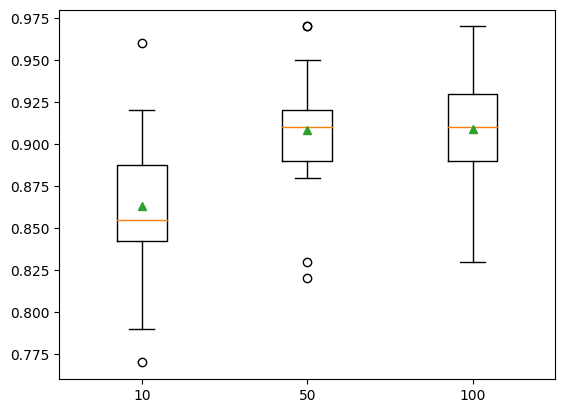

In [ ]:
show_results(X, y, models)

**Explore Tree Depth**

In [ ]:
def get_models():
    models = dict()
    for i in range(1,5):
        models[str(i)] = XGBClassifier(max_depth=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'1': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=1, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 '2': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False

1: 0.804 (0.037)
2: 0.879 (0.031)
3: 0.910 (0.029)
4: 0.919 (0.027)


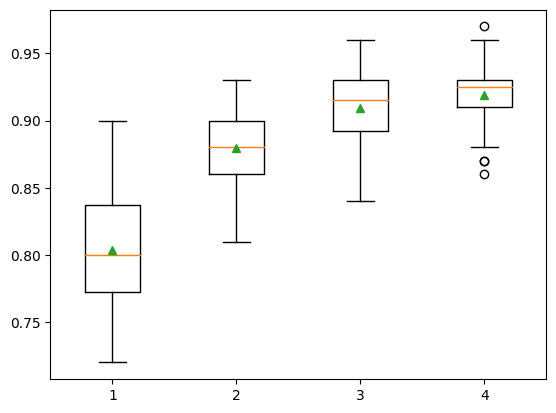

In [ ]:
show_results(X, y, models)

**Explore Learning Rate**

In [ ]:
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01]
    for r in rates:
        key = '%.4f' % r
        models[key] = XGBClassifier(eta=r)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'0.0001': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eta=0.0001, eval_metric=None,
               feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, predictor=None, ...),
 '0.0010': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical

0.0001: 0.796 (0.035)
0.0010: 0.802 (0.034)
0.0100: 0.837 (0.034)


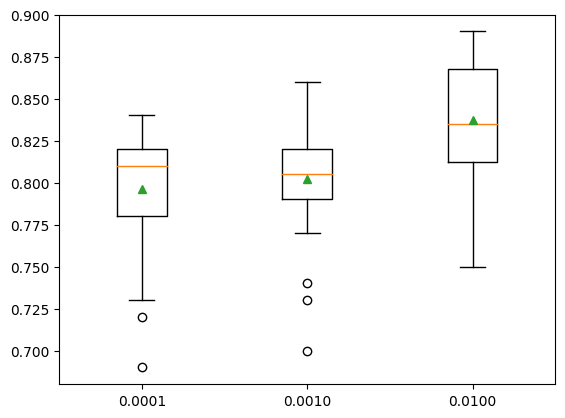

In [ ]:
show_results(X, y, models)

**Explore Sample Size**

In [ ]:
def get_models():
    models = dict()
    for i in arange(0.1, 0.4, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(subsample=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'0.1': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 '0.2': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorica

0.1: 0.849 (0.030)
0.2: 0.885 (0.027)
0.3: 0.909 (0.031)
0.4: 0.910 (0.025)


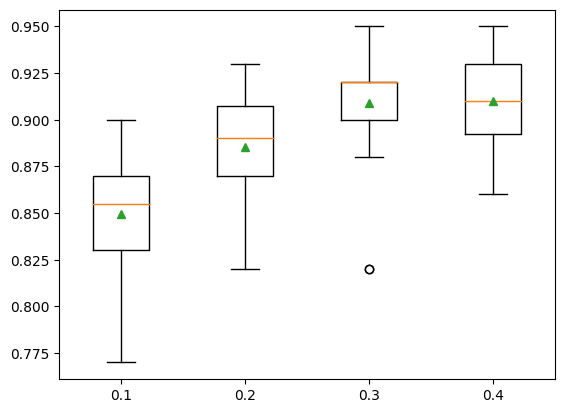

In [ ]:
show_results(X, y, models)

**Explore Number of Features**

In [ ]:
def get_models():
    models = dict()
    for i in arange(0.1, 0.3, 0.1):
        key = '%.1f' % i
        models[key] = XGBClassifier(colsample_bytree=i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'0.1': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.1, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 '0.2': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.2, early_stopping_rounds=None,
               enable_categorical=

0.1: 0.830 (0.035)
0.2: 0.896 (0.026)


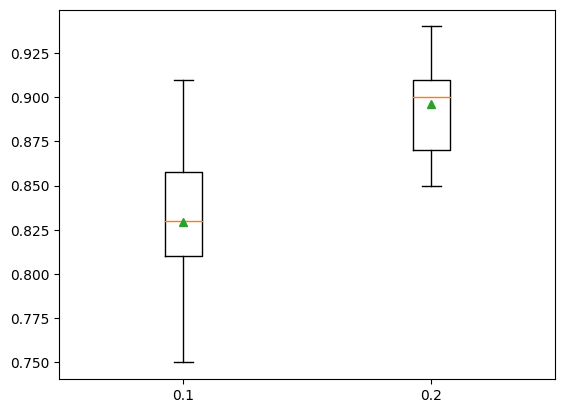

In [ ]:
show_results(X, y, models)

# Light Gradient Boosting Machine Ensemble 

## Evaluate LightGBM Ensembles

**LightGBM Ensemble for Classification**

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
X, y = make_clas_dataset()

In [ ]:
model = LGBMClassifier()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
print(f'{results.mean(): .3f} ({results.std(): .3f})')

 0.918 ( 0.032)


In [ ]:
model.fit(X, y)

LGBMClassifier()

In [ ]:
row = [0.2929949, -4.21223056, -1.288332, -2.17849815, -0.64527665, 2.58097719, 0.28422388,
-7.1827928, -1.91211104, 2.73729512, 0.81395695, 3.96973717, -2.66939799, 3.34692332,
4.19791821, 0.99990998, -0.30201875, -4.43170633, -2.82646737, 0.44916808]

In [ ]:
yhat = model.predict([row])
print(f'{yhat[0]}')

0


**LightGBM Ensemble for Regression**

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
X, y = make_reg_dataset()

In [ ]:
model = LGBMRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)

In [ ]:
print(f'{results.mean(): .3f} ({results.std(): .3f})')

-42.727 ( 3.651)


In [ ]:
model.fit(X, y)

LGBMRegressor()

In [ ]:
row = [0.20543991, -0.97049844, -0.81403429, -0.23842689, -0.60704084, -0.48541492,
0.53113006, 2.01834338, -0.90745243, -1.85859731, -1.02334791, -0.6877744, 0.60984819,
-0.70630121, -1.29161497, 1.32385441, 1.42150747, 1.26567231, 2.56569098, -0.11154792]

In [ ]:
yhat = model.predict([row])
print(f'{yhat[0]}')

-141.25948750929035


## LightGBM Hyperparameters

In [ ]:
from lightgbm import LGBMClassifier

**Explore Number of Trees**

In [ ]:
def get_models():
    models = dict()
    n_trees = [10, 50]
    for n in n_trees:
        models[str(n)] = LGBMClassifier(n_estimators = n)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'10': LGBMClassifier(n_estimators=10), '50': LGBMClassifier(n_estimators=50)}

10: 0.829 (0.033)
50: 0.900 (0.038)


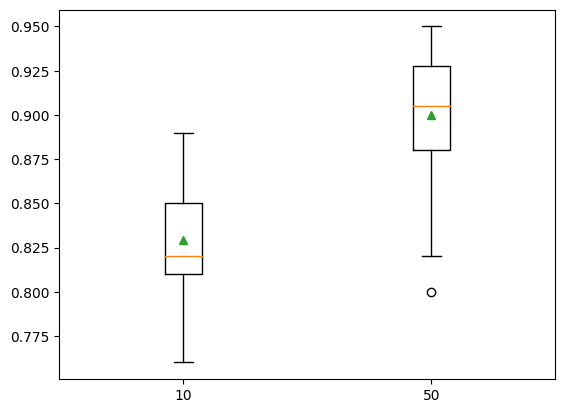

In [ ]:
show_results(X, y, models)

**Explore Tree Depth**

In [ ]:
def get_models():
    models = dict()
    for i in range(1,5):
        models[str(i)] = LGBMClassifier(max_depth=i, num_leaves=2**i)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'1': LGBMClassifier(max_depth=1, num_leaves=2),
 '2': LGBMClassifier(max_depth=2, num_leaves=4),
 '3': LGBMClassifier(max_depth=3, num_leaves=8),
 '4': LGBMClassifier(max_depth=4, num_leaves=16)}

1: 0.788 (0.040)
2: 0.852 (0.035)
3: 0.886 (0.032)
4: 0.901 (0.029)


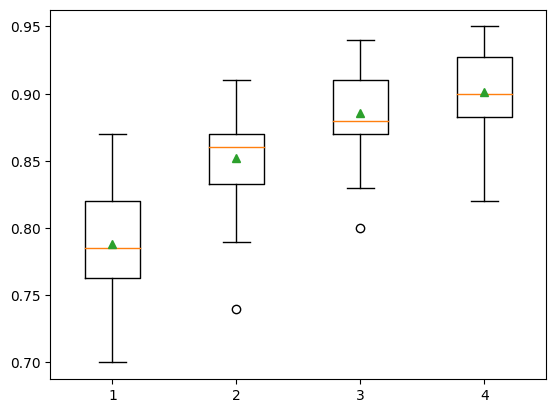

In [ ]:
show_results(X, y, models)

**Explore Learning Rate**

In [ ]:
def get_models():
    models = dict()
    rates = [0.0001, 0.001, 0.01]
    for r in rates:
        key = '%.4f' % r
        models[key] = LGBMClassifier(learning_rate=r)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()
models

{'0.0001': LGBMClassifier(learning_rate=0.0001),
 '0.0010': LGBMClassifier(learning_rate=0.001),
 '0.0100': LGBMClassifier(learning_rate=0.01)}

0.0001: 0.779 (0.036)
0.0010: 0.788 (0.039)
0.0100: 0.826 (0.035)


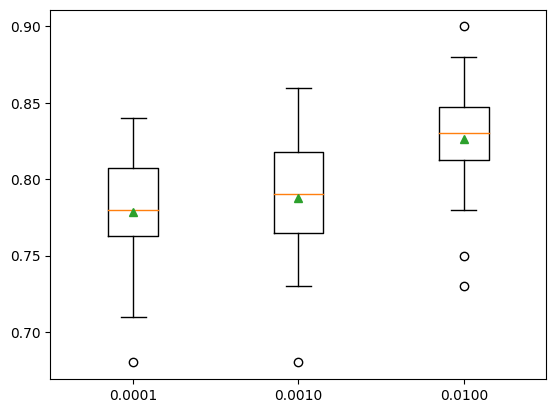

In [ ]:
show_results(X, y, models)

**Explore Boosting Type**

In [ ]:
def get_models():
    models = dict()
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = LGBMClassifier(boosting_type=t)
    return models

In [ ]:
X, y = make_clas_dataset()

In [ ]:
models = get_models()

gbdt: 0.918 (0.032)
dart: 0.893 (0.029)
goss: 0.898 (0.032)


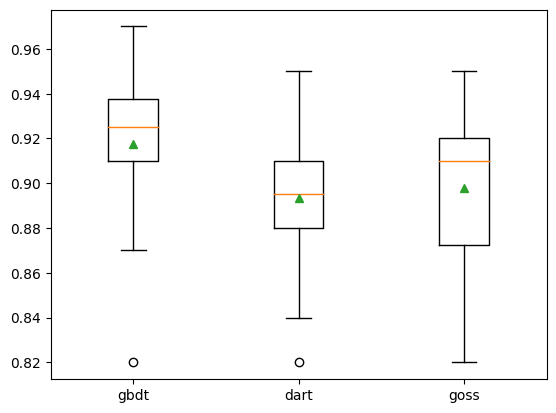

In [ ]:
show_results(X, y, models)